# Import packages

In [4]:
#Test
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Set styles and sizes

In [5]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

# Import data set

In [6]:
# Dataset URL on GitHub
url = 'https://raw.githubusercontent.com/ErikBusk/Happiness_v2/main/World-happiness-report-2024.csv'

# Read the dataset into a DataFrame
df = pd.read_csv(url, encoding='latin-1')

# Data cleaning

In [7]:
# Understand data set

In [8]:
df.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [6]:
len(df)

143

In [7]:
# Only keep columns relevant for analysis

In [8]:
df_columns = ['Country name' , 'Regional indicator' , 'Ladder score', 'Log GDP per capita' , 'Social support' , 'Healthy life expectancy' , 'Freedom to make life choices' , 'Generosity' , 'Perceptions of corruption']

In [9]:
df = df[df_columns].copy()

In [10]:
# Rename columns
happy_df = df.rename(columns={
    'Country name': 'country_name',
    'Regional indicator': 'regional_indicator',
    'Ladder score': 'happiness_score',
    'Log GDP per capita': 'log_gdp_per_capita',
    'Social support': 'social_support',
    'Healthy life expectancy': 'healthy_life_expectancy',
    'Freedom to make life choices': 'freedom_to_make_life_choices',
    'Generosity': 'generosity',
    'Perceptions of corruption': 'perceptions_of_corruption'
})

In [11]:
happy_df.head()

,country_name,regional_indicator,happiness_score,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.741,1.844,1.572,0.695,0.859,0.142,0.546
1,Denmark,Western Europe,7.583,1.908,1.520,0.699,0.823,0.204,0.548
2,Iceland,Western Europe,7.525,1.881,1.617,0.718,0.819,0.258,0.182
3,Sweden,Western Europe,7.344,1.878,1.501,0.724,0.838,0.221,0.524
4,Israel,Middle East and North Africa,7.341,1.803,1.513,0.740,0.641,0.153,0.193


In [12]:
# Remove any null values
happy_df.isnull().sum()

country_name                    0
regional_indicator              0
happiness_score                 0
log_gdp_per_capita              3
social_support                  3
healthy_life_expectancy         3
freedom_to_make_life_choices    3
generosity                      3
perceptions_of_corruption       3
dtype: int64

In [13]:
happy_df = happy_df.dropna()
happy_df = happy_df[(happy_df != 0).all(axis=1)]

# Exploratory data anlaysis

In [14]:
happy_df.describe()

,happiness_score,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,5.575919,1.397793,1.143156,0.526519,0.626259,0.147163,0.156622
std,1.137620,0.407215,0.322953,0.159806,0.155905,0.072739,0.127441
min,2.707000,0.534000,0.128000,0.156000,0.172000,0.014000,0.006000
25%,4.726000,1.085500,0.924500,0.400000,0.535000,0.095000,0.068500
50%,5.816000,1.433000,1.239000,0.556000,0.644000,0.138000,0.122000
75%,6.445000,1.759000,1.390000,0.653500,0.741000,0.192500,0.196000
max,7.741000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000


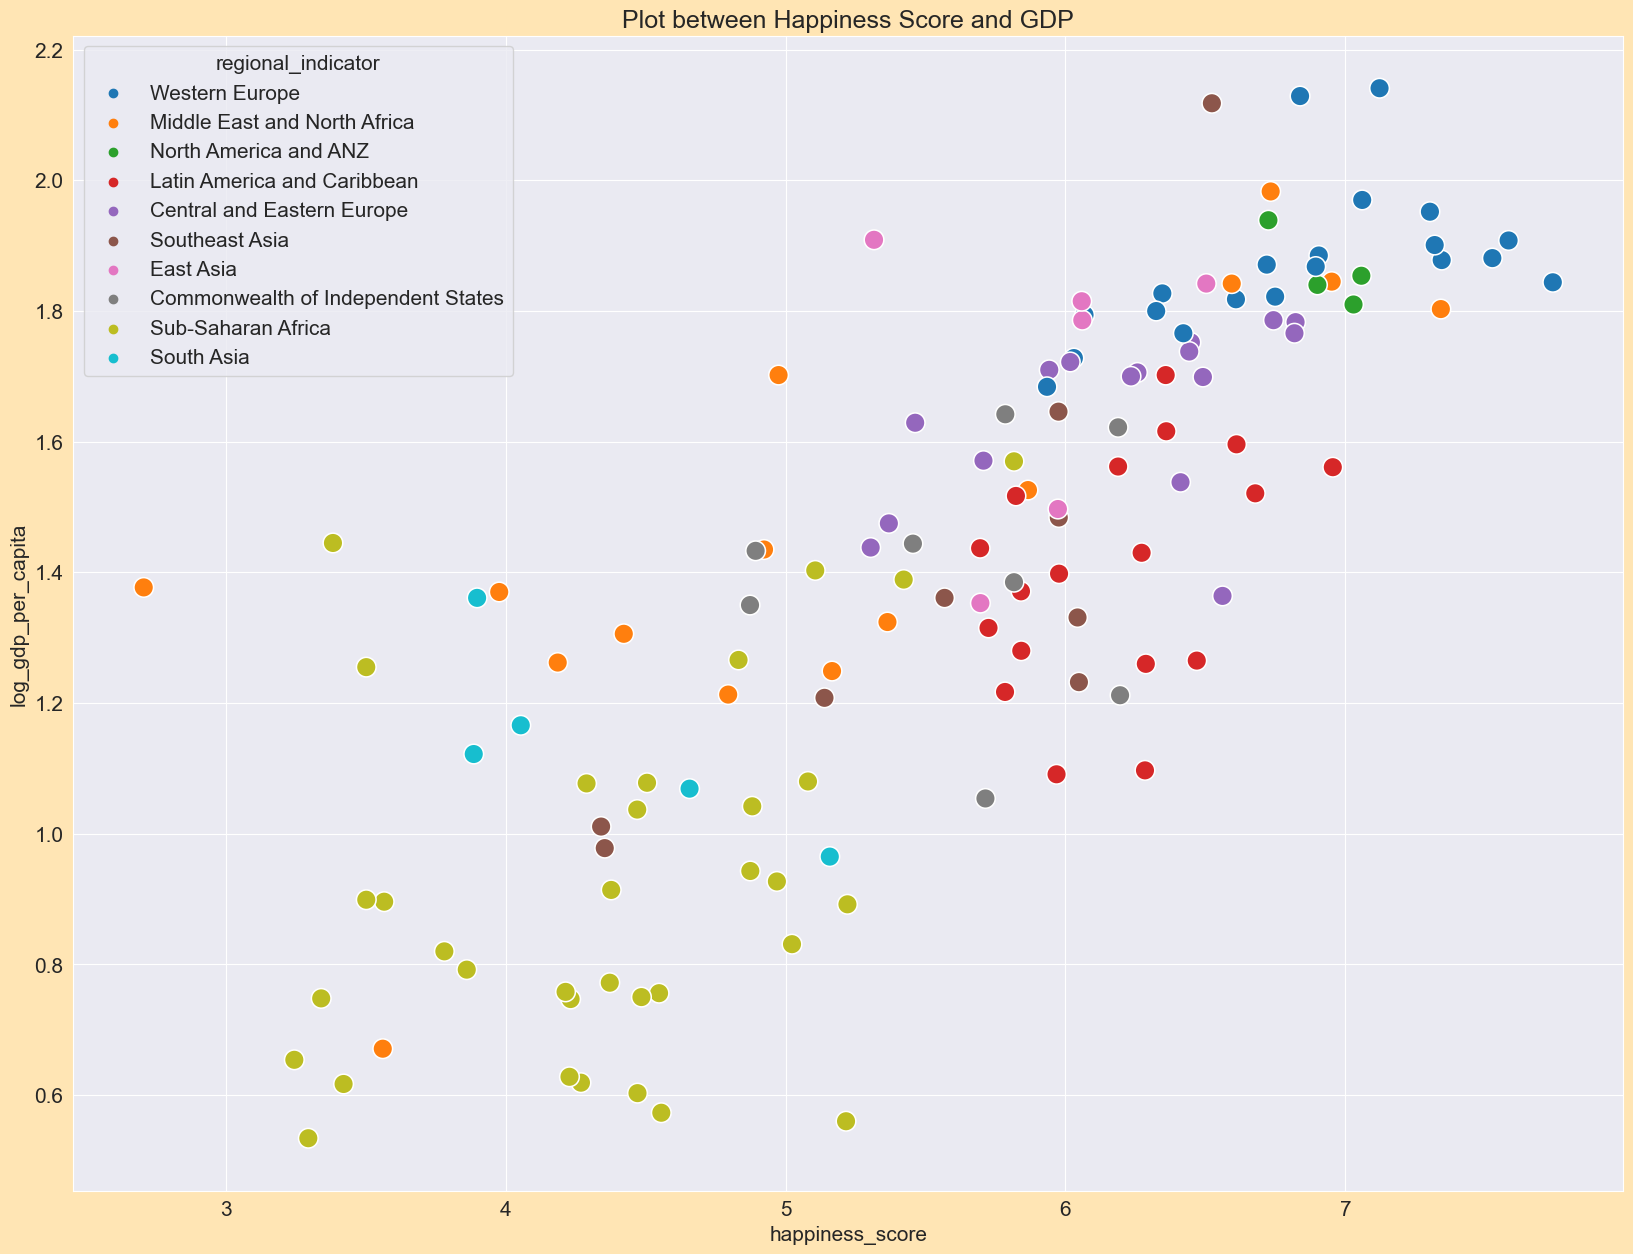

In [15]:
#Plot happiness and GDP

# Set the figure size
plt.rcParams['figure.figsize'] = (20, 15)

# Create the plot
plt.title('Plot between Happiness Score and GDP')
sns.scatterplot(x=happy_df.happiness_score, 
                 y=happy_df.log_gdp_per_capita, 
                 hue=happy_df.regional_indicator, 
                 s=200)

# Show the plot
plt.show()

In [16]:
# Conclusion - There seems to be a correlation between gdp per capita and happiness score. Countries in western Europe seems to be at the top in this regard

In [17]:
# Total countries per region

total_country = happy_df.groupby('regional_indicator')[['country_name']].count()
print(total_country)

                                    country_name
regional_indicator                              
Central and Eastern Europe                    16
Commonwealth of Independent States             8
East Asia                                      6
Latin America and Caribbean                   18
Middle East and North Africa                  15
North America and ANZ                          4
South Asia                                     5
Southeast Asia                                 9
Sub-Saharan Africa                            34
Western Europe                                20


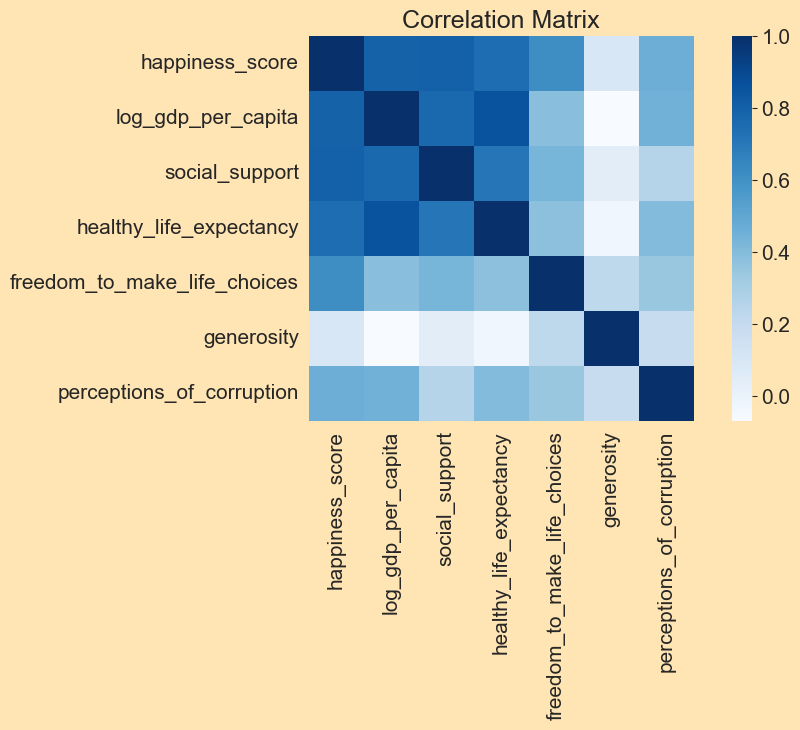

In [19]:
# Create correlation matrix

numeric_df = happy_df.select_dtypes(include=[np.number])
cor = numeric_df.corr(method='pearson')
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(cor, cmap='Blues', square=True, ax=ax)

plt.title('Correlation Matrix')
plt.show()

In [20]:
# Corruption per region
corruption = happy_df.groupby('regional_indicator')[['perceptions_of_corruption']].mean()
corruption

,perceptions_of_corruption
regional_indicator,
Central and Eastern Europe,0.094938
Commonwealth of Independent States,0.115875
East Asia,0.200000
Latin America and Caribbean,0.110500
Middle East and North Africa,0.146067
North America and ANZ,0.335000
South Asia,0.101800
Southeast Asia,0.164556
Sub-Saharan Africa,0.112206


In [21]:
plt.rcParams('figure.figsize') = (12,8)
plt.title('Perception of corruption in various regions')

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (1285307744.py, line 1)